## Measures of Variability

### Range

The Range is the difference between the lowest and highest values.

Example: In {4, 6, 9, 3, 7} the lowest value is 3, and the highest is 9.

So the range is 9 − 3 = 6.

#### The Range can be misleading

The range can sometimes be misleading when there are extremely high or low values.

Example: In {8, 11, 5, 9, 7, 6, 3616}:

+ the lowest value is 5,
+ and the highest is 3616,

So the range is 3616 − 5 = 3611.

The single value of 3616 makes the range large, but most values are around 10.

#### Interquartile Range

The interquartile range (IQR) contains the second and third quartiles, or the middle half of your data set. Whereas the range gives you the spread of the whole data set, the interquartile range gives you the range of the middle half of a data set

The interquartile range is not vulnerable to outliers, and whatever the distribution of the data, we know that 50% of them will lie within IQR

### Tasks

Write a function that takes in an array of numerical values and returns the range of that array.

In [1]:
def find_range(array):   
    return max(array) - min(array)

In [2]:
import pandas as pd

houses = pd.read_table('data/AmesHousing_1.txt')

In [8]:
find_range(houses['SalePrice'])

742211

## Standard Deviation

Standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance. The standard deviation is calculated as the square root of variance by determining each data point's deviation relative to the mean.

If the data points are further from the mean, there is a higher deviation within the data set; thus, the more spread out the data, the higher the standard deviation. 



Write a function that takes in a numerical array and returns the mean absolute deviation. Inside the function:

+ Compute the mean of the array.
+ Loop through the values of the array. For each iteration:

    + Compute the absolute distance (deviation). You can use the `abs()` function.
    + Append the absolute distance to a list.

+ Return the mean of the list containing all the absolute distances.

Compute the mean absolute deviation of distribution C  and assign the result to a variable named mad.

+ Is the result considerably less than 20 but greater than 0, as we expected?


In [9]:
C = [1,1,1,1,1,1,1,1,1,21]

def mean_absolute_deviation(array):  
    reference_point = sum(array) / len(array) 
    
    distances = []    
    
    for value in array:     
        absolute_distance = abs(value - reference_point)
        distances.append(absolute_distance)  
        return sum(distances) / len(distances)
 
mad = mean_absolute_deviation(C)

## Variance

The term variance refers to a statistical measurement of the spread between numbers in a data set. More specifically, variance measures how far each number in the set is from the mean (average), and thus from every other number in the set.

Write a function that takes in a numerical array and returns the variance of that array. Inside the function:

+ Compute the mean of the array.
+ Loop through the values of the array. For each iteration:
    + Compute the squared distance (squared deviation).
    + Append the squared distance to a list.
+ Return the mean of the list of squared distances.

Compute the variance of distribution C, and assign the result to a variable named variance_C.

+ Is the result considerably less than 20 but greater than 0, as we expected?

In [14]:
# not working correctly?
def calc_variance(array):  
    reference_point = sum(array) / len(array) 
    
    distances = []    
    
    for value in array:     
        absolute_distance = abs(value - reference_point)
        square_distance = absolute_distance**2
        distances.append(square_distance)  
        return sum(distances)
 
my_var =calc_variance(C)

A function for standard deviation

In [17]:
from math import sqrt

def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

In [18]:
standard_deviation(C)

6.0

 standard deviation of the SalePrice variable should give us a picture about the diversity of prices on the real estate market.

+ Find the year with the greatest variability of prices and assign the answer as an integer to the variable greatest_variability.
+ Find the year with the lowest variability of prices and assign the answer as an integer to the variable lowest_variability.
+ Use the function you wrote in the previous screen to measure the standard deviation of each year.
+ You can find information about the years of sale in the Yr Sold column.

In [19]:
years = {}

for year in houses['Yr Sold'].unique():
    year_segment = houses[houses['Yr Sold'] == year]
    st_dev = standard_deviation(year_segment['SalePrice'])
    years[year] = st_dev

# Get years of max and min variability
greatest_variability = max(years, key = years.get) # outputs directly the year with the maximum variability
lowest_variability = min(years, key = years.get) # outputs directly the year with the minimum variability

### sd: a measure of spread

Another way to understand standard deviation is as a measure of spread in a distribution — values in a distribution can be more or less spread. We took four random samples of 50 sample points each from the SalePrice distribution, and plotted their histograms to visualize the spread for each sample:

![Measuring spread](img/s2m4_spreads.svg)

According to our visual estimates, sample 2 has the biggest spread, while the other three samples have a similar spread, with sample 3 seemingly having the lowest spread. The standard deviations of these four distributions fit our visual estimates fairly well:

In [20]:
for i in range(1,5):
    sample = houses['SalePrice'].sample(50, random_state = i)
    # we used the same random states for the samples in the graph above
    st_dev = standard_deviation(sample)
    print('Sample ' + str(i) + ': ' + str(st_dev))

Sample 1: 81785.0811515768
Sample 2: 100370.62998094413
Sample 3: 60676.038515710636
Sample 4: 64436.40016450328


Generate 4 random samples for "Year Built" and discuss their distribution

Sample 1: 29.239589600403075
Sample 2: 32.466234767832255
Sample 3: 29.649344006233928
Sample 4: 28.253141418256483


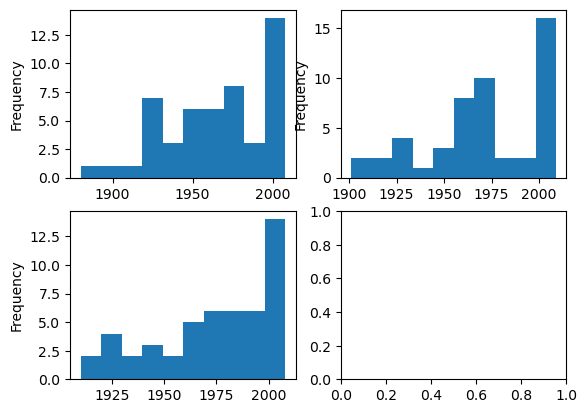

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
for i in range(1,5):
    sample = houses['Year Built'].sample(50, random_state = i)
    # we used the same random states for the samples in the graph above
    st_dev = standard_deviation(sample)
    sample.plot.hist() 
    plt.subplot(2,2,i)
    print('Sample ' + str(i) + ': ' + str(st_dev))